<a href="https://colab.research.google.com/github/joony0512/Statistics-and-NLP/blob/main/%ED%8A%B8%EC%9C%84%ED%84%B0%EB%A5%BC_%EC%82%AC%EC%9A%A9%ED%95%9C_%EC%84%9C%EC%9A%B8%EC%9D%98_%EC%A7%80%EC%97%AD%EB%B3%84_%ED%8A%B8%EB%A0%8C%EB%93%9C_%EB%B6%84%EC%84%9D_%EC%86%A1%EB%A6%AC%EB%8B%A8%EA%B8%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn
!pip install customized_konlpy
!pip install konlpy
!pip install soynlp
!pip install nltk
!pip3 install git+https://github.com/tobe93gf/snscrape.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tobe93gf/snscrape.git to /tmp/pip-req-build-ancx9x8n
  Running command git clone -q https://github.com/tobe93gf/snscrape.git /tmp/pip-req-build-ancx9x8n


# 모듈 IMPORT

In [ ]:
#웹크롤링 모듈
import snscrape.modules.twitter as sntwitter
import itertools #반복
from nltk.corpus import stopwords #불용어 제거
from nltk.tokenize import word_tokenize #단어자를때
import re #URL, 임티 지울때

#KoNLPy 태깅 관련 모듈
from konlpy.tag import Twitter

#TF-IDF 관련 모듈
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
import numpy as np

#데이터프레임 모듈
import pandas as pd

# 데이터 구축


In [ ]:

# 트윗리스트 생성
tweets_list = []

# TwitterSearchScraper 사용
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('송리단길 since:2022-11-19 until:2022-12-19').get_items()):
    # 좋아요 수가 3 이상인 트윗만을 불러옴 : 연관성 높이기
      if i>5000:
        break 
      else:
        tweets_list.append([tweet.date, tweet.content, tweet.likeCount])

# 날짜및 시간, 내용, 좋아요수 컬럼만 선택하여 데이터 프레임 구축
tweets_list = pd.DataFrame(tweets_list, columns=['Datetime',  'content', 'like'])

In [ ]:
#pandas DataFrame으로 변환
aaa = pd.DataFrame(tweets_list)
aaa= aaa.sort_values('like', ascending=False)


In [ ]:
print(aaa.shape)
print(aaa.head(1))
print(aaa.tail(1))

(232, 3)
                     Datetime  \
153 2022-11-30 01:23:05+00:00   

                                               content  like  
153  송파동 야끼소바니주마루\n송리단길에 위치한 야끼소바 전문점. 인기가 워낙 많아 대기...   856  
                     Datetime  \
116 2022-12-05 06:18:03+00:00   

                                               content  like  
116  줄서는식당 클래식미트파이 크리미치킨머쉬룸파이 폴드포크파이 망고치즈파이 피스타치오파이...     0  


## 데이터 EDA

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

font_name = font_manager.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf").get_name()
rc('font', family=font_name)

Text(0, 0.5, '빈도 수')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

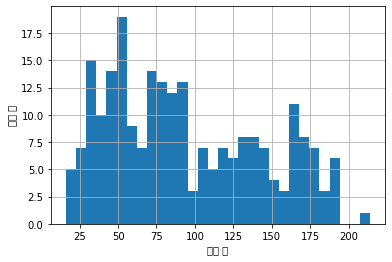

In [ ]:
# 문장 내 총 글자수
ax = aaa['content'].str.len().hist(bins=30)
ax.set_xlabel('글자 수')
ax.set_ylabel('빈도 수')

Text(0, 0.5, '빈도 수')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51339 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51339 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text

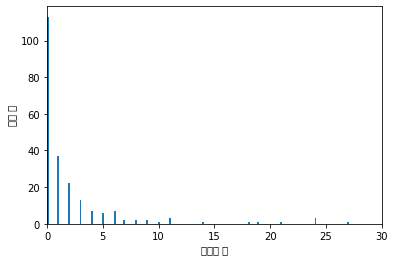

In [ ]:
#좋아요수 3개이상으로 
plt.hist(aaa['like'], bins = 5000) 
plt.xlim([0, 30])   
plt.xlabel('좋아요 수')
plt.ylabel('빈도 수')

Text(0, 0.5, '빈도 수')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53360 missing from current font.
  font.set_text(s, 0, flags=flags)


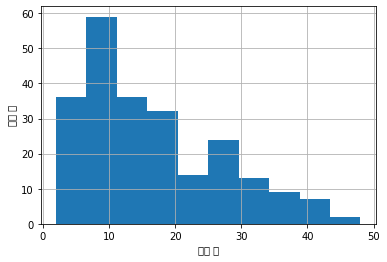

In [ ]:
#토큰 수
ax = aaa['content'].str.split().map(lambda x: len(x)).hist()

ax.set_xlabel('토큰 수')
ax.set_ylabel('빈도 수')

Text(0, 0.5, '빈도 수')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_te

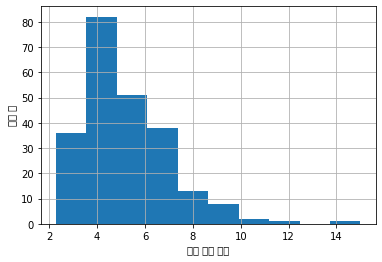

In [ ]:
#토큰별 길이 평균
ax =aaa['content'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

ax.set_xlabel('토큰 길이 평균')
ax.set_ylabel('빈도 수')

## 데이터 정제

In [ ]:
from konlpy.tag import Okt
okt=Okt()


In [ ]:
def CleanText(readData, Num=True, Eng=True):

    total_text =''

    # Remove Retweets
    text = re.sub('RT @[\w_]+: ', '', readData)
    # Remove Mentions
    text = re.sub('@[\w_]+', '', text)
    # Remove or Replace URL
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ',
                  text)  # http로 시작되는 url
    text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ',
                  text)  # http로 시작되지 않는 url
    # Remove only hashtag simbol "#" because hashtag contains huge information
    text = re.sub(r'#', ' ', text)
    # Remove Garbage Words (ex. &lt, &gt, etc)
    text = re.sub('[&]+[a-z]+', ' ', text)
    # Remove Special Characters
    text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    # Remove 출처 by yamada
    text = re.sub(r"(출처.*)", ' ', text)
    # Remove newline
    text = text.replace('\n', ' ')

    if Num is True:
        # Remove Numbers
        text = re.sub(r'\d+', ' ', text)

    if Eng is True:
        # Remove English
        text = re.sub('[a-zA-Z]', ' ', text)

    # Remove multi spacing & Reform sentence
    text = ' '.join(text.split())


    
    text = okt.pos(text)
    word = []
    stopwords ='만남 추천 가슴 일상 룸싸룽 안마 오프 예약 조건 섹트 흥분 쾌감 마구 소리 맘껏 애 성교 난생 처음 란제리 룸 애인 대행 패티 쉬 용인 귀요미 아가씨 명도 아줌마출장 게이 보지 진짜 우리 다시 오늘 지금 사람 보고 생각 강남 서울 그냥 이제 광고 정말 아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓 '
    for i in text:
      if not i[0] in stopwords:
              if i[1] == 'Noun':
                  word.append(i[0])

    word = ' '.join(word)
    word += '. '
    total_text += word
    return total_text

In [ ]:

cleaned_tweet = []
for tweet in aaa['content']:
  # 한글 불용어 처리를 위해 Eng에 False값을 준다
  cleaned_tweet_string = CleanText(tweet, Num=True, Eng=False)
  cleaned_tweet.append(cleaned_tweet_string)

In [ ]:
# 데이터 저장. 
cleaned_tweet = cleaned_tweet[0:500]
pd.DataFrame(cleaned_tweet).to_csv('SongridangilData.csv')

### 저장 된 파일 불러오기

In [ ]:
import pandas as pd
cleaned_tweet = pd.read_csv('SongridangilData.csv')
#cleaned_tweet = pd.read_csv('MyungdongData.csv')
cleaned_tweet.columns=['index', 'content']
cleaned_tweet.set_index('index')
cleaned_tweet_list = list(cleaned_tweet['content'])
cleaned_tweet=cleaned_tweet_list
print(cleaned_tweet[:5])


['송파동 야끼소바 마루 송리단길 위치 야끼소바 전문점 인기 워낙 대기 필수 소금 양념 맛 토핑 추가 가능 가게 직접 갠 야끼소바 우동 식감 가격. ', '송리단길. ', '슈가 배우 이제훈 송강 연예인 식당 송리단길 파이 맛집 타래. ', '송리단길 갓 음식 행복 순영 월드 와이드 핸썸 보스. ', '송리단길 유우 링 쟈니 타가 무조건 카츠 묘 듀엣 잡지 주로 섹시 존 킹 프리 잡지 제일 나니 단도 주니어 시절 꼭 맛집 베스 시리 링 링. ']


### 단어 끊어짐을 예방하기 위한 단어사전 등록

In [ ]:
from ckonlpy.tag import Twitter
twitter = Twitter()

/usr/local/lib/python3.8/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
# 서울 상권 데이터를 사용해 단어사전 구축

seoul_csv = pd.read_csv('seoul_csv.csv')
seoul_csv.head(50)

,상호명,시군구명
0,제중건강원,영등포구
1,민속악기사,성동구
2,태평양진주,종로구
3,김선희꼼꼼국어교습소,송파구
4,비지트,서초구
5,쓰리에프,동작구
6,다향,서초구
7,고향생막걸리,강남구
8,무비디자인,마포구
9,우신타이어,중랑구


In [ ]:
seoul_list = list(seoul_csv['상호명'])
seoul_list

['제중건강원',
 '민속악기사',
 '태평양진주',
 '김선희꼼꼼국어교습소',
 '비지트',
 '쓰리에프',
 '다향',
 '고향생막걸리',
 '무비디자인',
 '우신타이어',
 '연세공인중개사사무소',
 'NOV스튜디오',
 '도전최강달인왕만두',
 'L.A.D',
 '양푼이김치찌개',
 '은진이네',
 '흥부보쌈',
 '왕십리제일곱창',
 '힐리빙텔',
 '김샘수학교습소',
 '커피빈',
 '자마이카휘트니스',
 '대동석유압구정주유소',
 '이삭토스트',
 '장수식당',
 '옥돌영양탕',
 '현대자동차중앙로중앙점',
 '티월드홍제역점',
 '피터팬플라워',
 '웰빙',
 '뜨락꽃집',
 '캐논비즈니스프라자전시장',
 '북경깐풍기',
 '미래공인중개사',
 '소낙스',
 '선경바둑',
 '대성부동산',
 '불과얼음',
 '붕붕카센타',
 '러쉬',
 '삼양세탁소',
 '디자인나르세인',
 '리틀랜드',
 '노바수학학원',
 '엘앤비',
 '대박마트',
 '남강컴퓨터',
 '럭키공인',
 '약손명가에스테틱',
 '옵티멀에너지서비스',
 '타임투컴퍼니',
 '푸른산업',
 '휴하우스케어',
 '울시',
 '까르떼',
 '김성자콜렉션',
 '알뜰정육',
 '법률사무소도윤',
 '행복공인중개사무소',
 '오리고',
 '라이브존레스토랑',
 '명봉화과점',
 '인수봉상회',
 'OK노래연습장',
 '맛생맛사',
 '현대공인중개사사무소',
 '두산인테리어',
 '샐리',
 '미소인테리어가구',
 '잠뱅이방이점',
 '세원아이티씨신세계백화점본점',
 '영산자동차공업사',
 '로뎅공방',
 '그린교육사',
 '퀸메리골프',
 '남우',
 '월드탑공인중개사사무소',
 '365플러스편의점',
 '스트레칭.찜',
 'E-전산',
 '더쉬스튜디오',
 '화랑공인중개사사무소',
 '오렌지음악교습소',
 '하이마트삼양롯데마트점',
 'GM어패럴',
 '득템pc방',
 '구립큰솔어린이집',
 '대덕떡사랑',
 '대흥고시원',
 '럭셔리노래연습장',
 '뷰티헤어샵',
 '도도렌트카',

In [ ]:
# 직접 단어사전 추가
songlidan_list = ['롯데월드','롯데타워','롯데월드몰','롯데월드타워','롯데백화점', '야끼소바니주마루', '야끼소바', '멘야하나비', '타코몽', '애정마라샹궈', '볼우물', '구스따레일젤라또', '젤라또집', '룰루베이글', '카페페퍼', '석촌호수', '송리단취향', '웨이팅', '소품샵', '단디', '대창덮밥', '특호르몬동', '스카치에그', '테티', '호르몬동', '사케동', '스프링롤', '다케오 호르몬 데판야끼', '호르몬동', '메밀집', '유우링', '코타츠', '메론케이크', '펫어케이크', '오쓰세이로무시', '웰하우스', '버터바', '옥수수바치케', '먹자골목', '봉땅', '요찌무', '마제소바', '니드스윗', '온실카페', '샤인머스켓 요거트 케이크', '니주마루 야끼소바', '더빛남', '쌀국수집 더빛남', '피자 네버 슬립스','온량', '카페페퍼', '미자식당', '마운틴누크', '리프 커피바', '오렌지커피', '올림픽 공원역', '본죽', '청년다방', '샤브샤브', '공차', '이디야', '고도식', '코히루', '테린느', '밤테린느', '벌스데이 젤라또', '벌스데이', '샤인머스캣요거트케이크', '메밀집 트러플 감자전', '메밀국수', '페퍼 카페', '카페 페퍼', '명란돈까스', '미자식당 명란돈까스', '명란크림파스타', '도라야끼', '츠부앙', '앙버터', '시즌메뉴', '가타커피', '송파나루역', '니드스윗', '바나나푸딩', '치즈초코케익', '초코케익', '감성채널', '즉석떡볶이', '리프커피바', '커피젤리', '온량', '토마호크 커틀렛', '왕돈가스', '로제파스타', '크림파스타', '콰트로 크림 파스타', '피자네버슬립스', '감자피자', '요찌무', '일본식', '기린 맥주', '코히루', '말차 테린느', '케키하우스', '마운틴 누크', '브런치카페', '명란파스타', '가타커피', '단디', '루이보스', '바닐라빈라떼', '오마카세집', '오레노라멘', '단디 호르몬동', '호르몬동', '단디다마고', '다마고', '티타임', '블루웨일', '카페수익금', '뷰클런즈', '스웨덴 커피', '오픈런', '빈티지 카페', '롯데월드몰', '롯데월드 몰', '고든램지버거', '아쿠아플래닛', '수족관카페', '러버덕', '파샬', '수제 햄버거', '핫치킨버거', '참외먹다', '리프커피', '리프커피 카이막', '카이막', '리프커피바', '디저티스트', '수비드안심수육', '트러플감자전', '웨이팅', '육쌈냉면', '도요스 가', '도요스', '낫또즈케마구로동', '치즈룸', '롯데시네마', '레스토랑', '실내체육관', '잠실새내', '월드몰', '미엔아이', '미앤아이', '우육면', '진저베어', '송계옥', '오복수산', '방이별관', '아그라', '별미곱창', '다케호르몬데판야끼', '배키욘방', '배키욘방카페', '얼터너티브', '자몽하다', '아쿠아리움', '놀이공원', '스케이트장', '롯데타워', '런던베이글', '라멘집', '봉추찜닭', '토끼정', '푸드코트', '식당가', '노티드도넛', '노티드', '푸딩집', '푸팟퐁커리', '크림 고로케', '할라피뇨 잼', '시간컷', '인생네컷', '포토이즘', '도넛', '개인카페', '크리스피', '가배유정', '수플레 팬케익', '롯월몰', '칸다소바', '마제소바', '야끼소바니주마루', '진지아', '돈부리파스타', '우육면', '신상카페', '뚱카롱', '마카롱', '베이글 카페', '킴스 델리 마켓', '고도식', '황리단길', '샤로수길', '남산타워', '뷰카페', '뷰맛집', '서울리즘', '샘', '수채화엽서', '피치그레이 카페', '피치그레이', '바니유', '롯데타워', '숲카페', '미니케이크', '비누작업실', '롯콘홀', '하이볼', '얼그레이 하이볼', '일본식 덮밥', '배키 욘방', '오레노라멘', '인생샷', '어피셔나도', '바리스타', '홀리데이', '타로집', '부룸스튜디오', '커피브랜드', '디슬로우', '갓잇', '생방송투데이', '스트리트 피자', '칸다소바', '아그라', '차알', '딤딤섬', '피에프창', '벚꽃', '이슬재', '카이센동', '카페 페퍼', '몽촌토성', '오레노 라멘', '담소스키야키', '오로라타로사주', '타로', '사주', '홍자씨샌드위치', '송파감자국', '강가 잠실점', '도쿄등심', '롯데캐슬', '스웨덴피크닉', '허심탄회', '설빙', '테티 카페', '테티', '온나 스끼야끼', '온나', '진저베어파이', '클래식미트파이', '블루베리파이', '스윗포테토파이', '아보카도파이', '와인샵', '랜드로바 떡볶이', '랜떡', '곱창', '또올래곱창', '콘치즈', '빈티지가게', '네일샵', '송리단길', '헬스장', '모녀다방', '인딕슬로우', '인도커리', '인도인' ]

In [ ]:
twitter.add_dictionary(seoul_list, 'Noun')
twitter.add_dictionary(songlidan_list, 'Noun')

### 문장 속 명사추출

In [ ]:
# 두글자 이상으로만 이루어진 명사들만 문장에 남김. =nouns_2
nouns_2=[]
for tweets in cleaned_tweet:
    nouns_1 = ''
    noun_list=[]
    for noun in list(set(twitter.nouns(tweets))):
        
        if len(noun) >= 2:
            noun_list.append(noun)
            
    word = ' '.join(noun_list)
      
    nouns_1+= word
            
    
    nouns_2.append(nouns_1)
nouns_2



['소금 송파동 토핑 추가 송리단길 식감 양념 야끼소바 대기 인기 직접 우동 가능 필수 가게 마루 가격 전문점 위치 워낙',
 '송리단길',
 '맛집 식당 파이 이제훈 슈가 배우 송리단길 타래 연예인 송강',
 '핸썸 음식 송리단길 월드 순영 보스 행복 와이드',
 '송리단길 주로 제일 섹시 듀엣 베스 무조건 시리 유우 단도 시절 잡지 맛집 카츠 타가 주니어 나니 프리 쟈니',
 '솔티 송파동 주시 레일 송리단길 망고 카라멜 센스 과일 방문 뻥튀기 자몽 레몬 상큼 주문 미니 시식 프루츠 스탠다드 젤라또 패션 위치',
 '주스 품절 먹기 메뉴인 초록 실물 가면 송리단길 오렌지 카페 메뉴 샌드위치 저녁',
 '한니발 송리단길 리프 레쉬 고독',
 '꽈배기 오열 가능 송리단길 봉땅',
 '망원 송리단길 모음 홍대 은휘 연남 푸딩 티엔 유우 티룸 페블 신촌 부르르 목화씨 엑스 유메 행궁동 맛집 커피 유원 라운지',
 '크림 나나 완전 송리단길 샐러드 돈부리 파스타 스테이크 린지 잠실 맛집 나중 탐방 재민 코타',
 '송리단길 테티',
 '쌀국수 존재 짜조 송리단길 그거 국물 찬희 요정 스프링롤 밥심',
 '영훈 둘이서 감자전 메밀 트러플 송리단길 이인 빵빵',
 '송리단길 조합 하우스 트리',
 '맛집 존맛 유우 오타쿠 천국 푸딩 먹음 우즈 수도 송리단길 승연 프라 코타츠 가기',
 '젠젠 송리단길 폭닥폭닥퐁신퐁신 사르르 케이크 플레',
 '송리단길 데이트 친구',
 '사케 에피타이저 스키야키 송리단길 개맛 연어 새우 튀김 세트 루롤 입안 가라 마제 장어 살살 산책 리노 동경',
 '우동 구이 무시 송리단길 메뉴 세이 여의도 갈치 오쓰',
 '티라미수 온실 내부 송리단길 카페 식물 먹잇감 마싯엇답',
 '누무 시킴 피자 먹음 트러플 별로 송리단길 포테이토 고르곤졸라',
 '꽈배기 유행 꽈페 시장 항상 옛날 송리단길 전문점 인테리어 제일 봉땅',
 '피자 치킨 슬립 송리단길 선택 네버 하프 레귤러 내부 포테이토 테이스티 기도 잠실 조합 원우 피맥',
 '클럽 리복',


# 키워드 추출 
- 방법 세가지 비교
1. 빈도수기반 : 단어사이 관계고려 x
2. tf-idf 
3. text_rank

## 1.빈도수기반 키워드 추출

In [ ]:
from collections import Counter
word_list =[]

for word in nouns_2:
    a=list(set(twitter.nouns(word)))
    for i in a:
        if i is not '.' or ' ':
            word_list.append(i)
    
word_list

nouns_counter = Counter(word_list)
top_nouns = dict(nouns_counter.most_common(30))
pd.DataFrame.from_dict(top_nouns, orient='index')

<>:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-71-1039d41c9ced>:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if i is not '.' or ' ':


,0
송리단길,229
맛집,48
카페,35
잠실,29
석촌호수,15
식당,13
피자,13
파스타,11
파이,10
치즈,10


## 2 . TF-IDF 키워드 추출

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from tqdm import tqdm
nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [ ]:
# 등장 단어리스트 추출 - 중복 없이
vocab = list(set(word_list))
vocab.sort()

### TF

In [ ]:
def tf(t, d):
    return d.count(t)
    
N = len(nouns_2)

result = []
for i in tqdm(range(N)): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = nouns_2[i]
    
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)
tf_

100%|██████████| 232/232 [00:00<00:00, 1245.04it/s]


,가가,가게,가격,가기,가능,가능성,가라,가래떡,가루,가맥집,...,환영,회전,횟집,후기,후식,후훌,훈슐랭,훠궈,휴게소,히터
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tf_.sum().sort_values(ascending = False)[:30]

송리단길    229
맛집       48
카페       36
잠실       34
파이       27
스타       21
석촌       21
석촌호수     15
식당       14
피자       13
송파       11
파스타      11
치즈       10
케이크      10
페퍼       10
음식        9
웨이        9
월드        9
성수        9
존맛        9
롯데        8
소개        8
커피        8
미트파이      8
망고        8
유우        8
근처        8
치킨        8
애플파이      7
고기        7
dtype: int64

### IDF

In [ ]:
from math import log


def idf(t):
    df = 0
    for doc in nouns_2:
        df += t in doc
    return log(N/(df + 1))


result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))
    

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])

In [ ]:
idf_.sort_values(by ='IDF',ascending = False)

,IDF
가가,4.753590
용량,4.753590
온실,4.753590
올림픽,4.753590
옷가게,4.753590
...,...
스타,2.402215
잠실,1.920377
카페,1.863218
맛집,1.554917


## TF-IDF

In [ ]:
def tfidf(t, d):
    return tf(t,d)* idf(t)

result = []
for i in tqdm(range(N)):
    result.append([])
    d = nouns_2[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

100%|██████████| 232/232 [00:08<00:00, 28.91it/s]


In [ ]:
tfidf_ = pd.DataFrame(result, columns = vocab)


pd.DataFrame(tfidf_.sum().sort_values(ascending = False)[:30])

,0
파이,75.807361
맛집,74.636020
카페,67.075864
잠실,65.292813
석촌,51.471107
스타,50.446514
석촌호수,40.112230
식당,38.341620
피자,36.499841
송파,32.580138


# text rank

In [ ]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords

In [ ]:
# 모든 문장을 한 문서로 붙임
text = '. '.join(nouns_2)
text

'소금 송파동 토핑 추가 송리단길 식감 양념 야끼소바 대기 인기 직접 우동 가능 필수 가게 마루 가격 전문점 위치 워낙. 송리단길. 맛집 식당 파이 이제훈 슈가 배우 송리단길 타래 연예인 송강. 핸썸 음식 송리단길 월드 순영 보스 행복 와이드. 송리단길 주로 제일 섹시 듀엣 베스 무조건 시리 유우 단도 시절 잡지 맛집 카츠 타가 주니어 나니 프리 쟈니. 솔티 송파동 주시 레일 송리단길 망고 카라멜 센스 과일 방문 뻥튀기 자몽 레몬 상큼 주문 미니 시식 프루츠 스탠다드 젤라또 패션 위치. 주스 품절 먹기 메뉴인 초록 실물 가면 송리단길 오렌지 카페 메뉴 샌드위치 저녁. 한니발 송리단길 리프 레쉬 고독. 꽈배기 오열 가능 송리단길 봉땅. 망원 송리단길 모음 홍대 은휘 연남 푸딩 티엔 유우 티룸 페블 신촌 부르르 목화씨 엑스 유메 행궁동 맛집 커피 유원 라운지. 크림 나나 완전 송리단길 샐러드 돈부리 파스타 스테이크 린지 잠실 맛집 나중 탐방 재민 코타. 송리단길 테티. 쌀국수 존재 짜조 송리단길 그거 국물 찬희 요정 스프링롤 밥심. 영훈 둘이서 감자전 메밀 트러플 송리단길 이인 빵빵. 송리단길 조합 하우스 트리. 맛집 존맛 유우 오타쿠 천국 푸딩 먹음 우즈 수도 송리단길 승연 프라 코타츠 가기. 젠젠 송리단길 폭닥폭닥퐁신퐁신 사르르 케이크 플레. 송리단길 데이트 친구. 사케 에피타이저 스키야키 송리단길 개맛 연어 새우 튀김 세트 루롤 입안 가라 마제 장어 살살 산책 리노 동경. 우동 구이 무시 송리단길 메뉴 세이 여의도 갈치 오쓰. 티라미수 온실 내부 송리단길 카페 식물 먹잇감 마싯엇답. 누무 시킴 피자 먹음 트러플 별로 송리단길 포테이토 고르곤졸라. 꽈배기 유행 꽈페 시장 항상 옛날 송리단길 전문점 인테리어 제일 봉땅. 피자 치킨 슬립 송리단길 선택 네버 하프 레귤러 내부 포테이토 테이스티 기도 잠실 조합 원우 피맥. 클럽 리복. 미소 사이다 짱짱 송리단길 찌무 츠케멘 칭구 스프라이트 칠성 숮프. 맛집 칫챗 잠실 파스타 송리단길 석촌 스테이크. 송리단길. 크림 

In [ ]:
key_nouns= keywords(text, ratio = 0.08,scores = True)
key_nouns

[('송리단길', 0.9306861736334191),
 ('파스타 스테이크', 0.06991212795849291),
 ('석촌호수', 0.05479010054975205),
 ('크리미', 0.04901819802630053),
 ('베트남', 0.049018198026300495),
 ('잠실역', 0.04395313496311936),
 ('케이크', 0.04138849851544452),
 ('젤라또', 0.04039284467365094),
 ('프라이', 0.04000881729586067),
 ('곱창전골', 0.040008817295860595),
 ('진짜진짜', 0.03853324824652791),
 ('스키야키', 0.038533248246527776),
 ('리조또', 0.03848521476392006),
 ('포테이토', 0.037755731281196296),
 ('무조건', 0.03775573128119626),
 ('와사비', 0.03649397135248341)]